Dataset Régression 

In [14]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [15]:
df= pd.read_excel("Real estate valuation data set.xlsx")
df.head()



,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [16]:
print(df.info())

#pour savoir plus d'information sur la dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


In [17]:
print(df.isnull().values.any())#pour vérifier s'il y'a des valeurs NAN ou non 
#sinon si pour consulter toutes les valeurs on fait df.isnull()

False


In [18]:
print(df.isnull().sum())#pour vérifier s'il y'a des valeurs NAN ou non 

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [19]:
print(df.duplicated().values.sum())#si on a des duplicate values 

0


In [20]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool


In [21]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048634,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048634,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,-0.032808,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

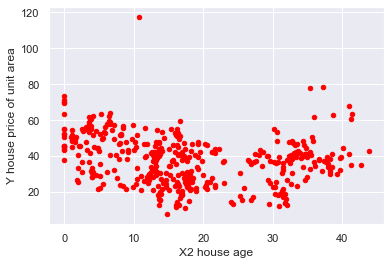

In [22]:
df.plot(kind = 'scatter', x = 'X2 house age', y = 'Y house price of unit area', color='red')



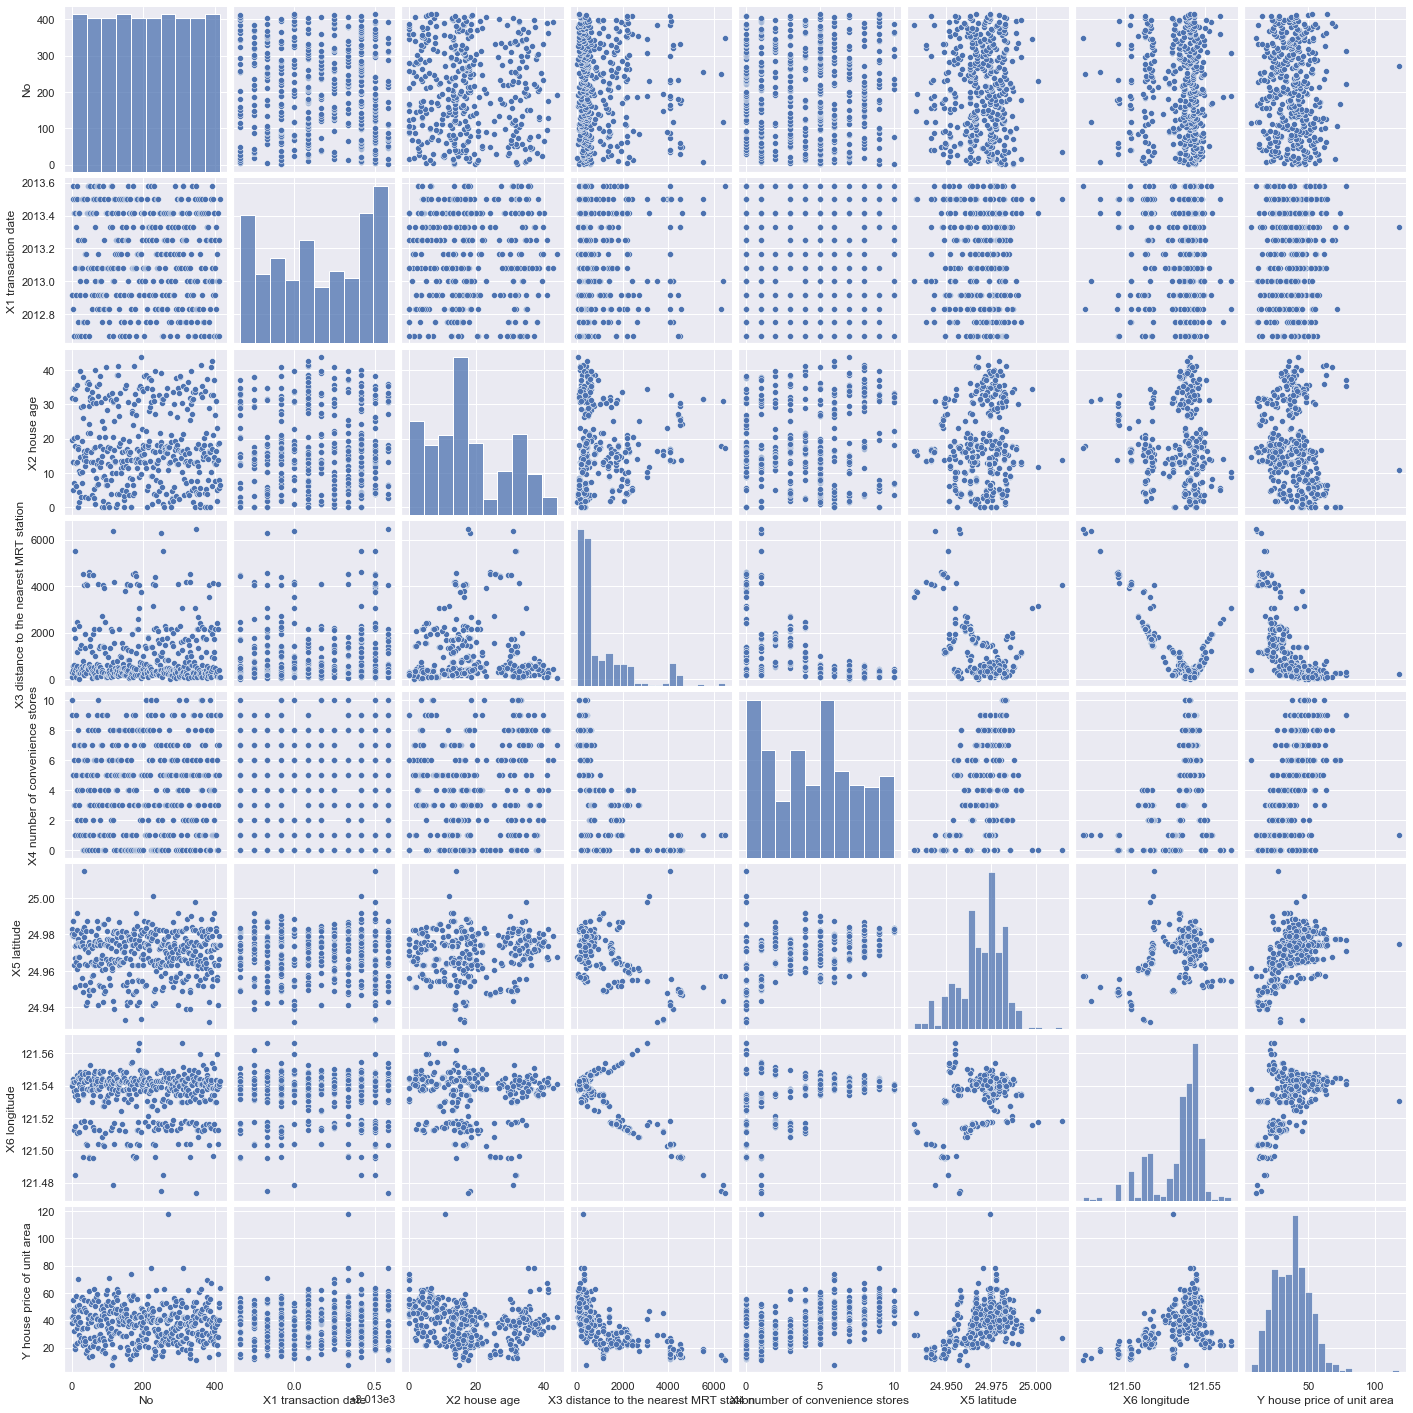

In [23]:
import seaborn as sns #corrélation
sns.pairplot(df)

<AxesSubplot:xlabel='X6 longitude', ylabel='Y house price of unit area'>

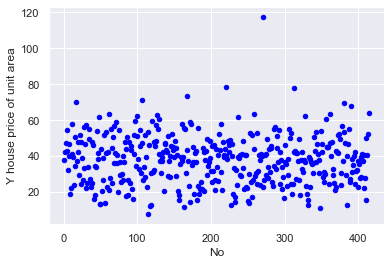

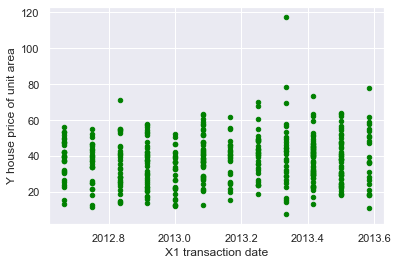

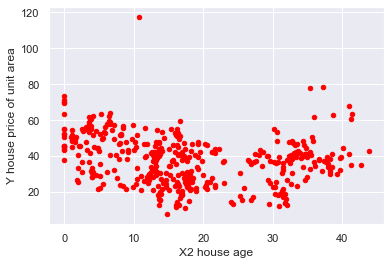

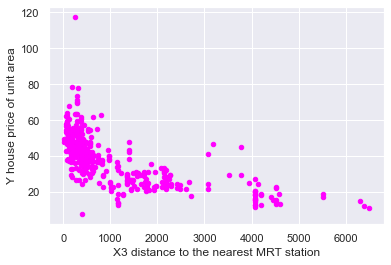

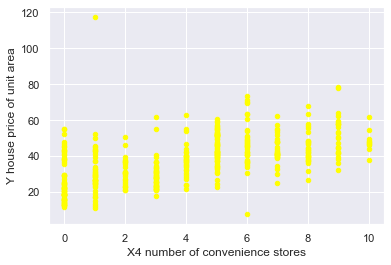

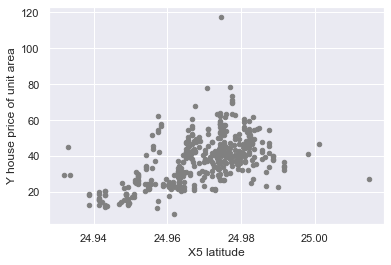

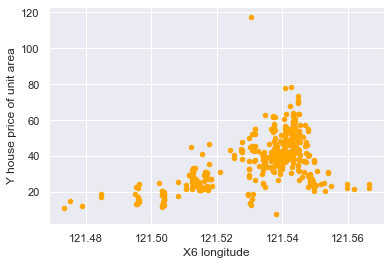

In [24]:
df.plot(kind = 'scatter', x = 'No', y = 'Y house price of unit area', color='blue')
df.plot(kind = 'scatter', x = 'X1 transaction date', y = 'Y house price of unit area', color='green')
df.plot(kind = 'scatter', x = 'X2 house age', y = 'Y house price of unit area', color='red')
df.plot(kind = 'scatter', x = 'X3 distance to the nearest MRT station', y = 'Y house price of unit area', color='magenta')
df.plot(kind = 'scatter', x = 'X4 number of convenience stores', y = 'Y house price of unit area', color='yellow')
df.plot(kind = 'scatter', x = 'X5 latitude', y = 'Y house price of unit area', color='gray')
df.plot(kind = 'scatter', x = 'X6 longitude', y = 'Y house price of unit area', color='orange')


In [25]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [26]:
#Rename the column
df.rename(
    columns={
        "X1 transaction date": "X1", 
        "X2 house age": "X2", 
        "X3 distance to the nearest MRT station": "X3",
        "X4 number of convenience stores": "X4",
        "X5 latitude": "X5",
        "X6 longitude": "X6",
        "Y house price of unit area": "Y",
    },
    inplace = True
)
df.head()

,No,X1,X2,X3,X4,X5,X6,Y
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


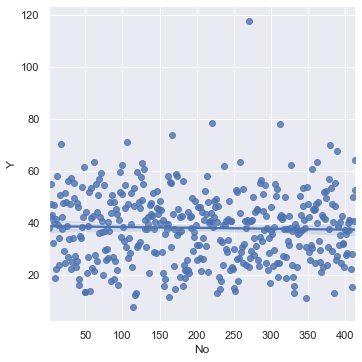

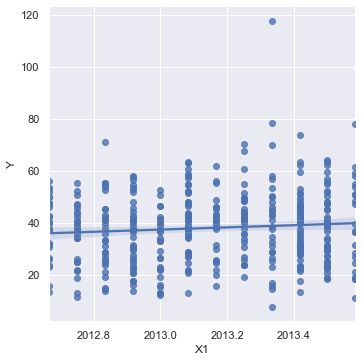

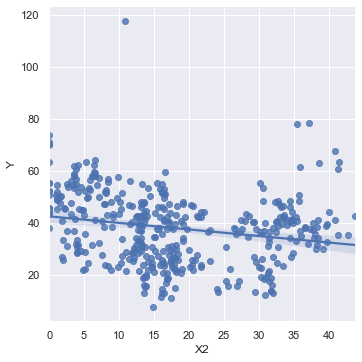

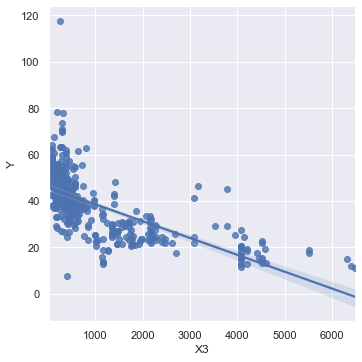

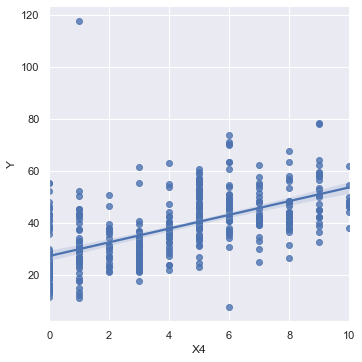

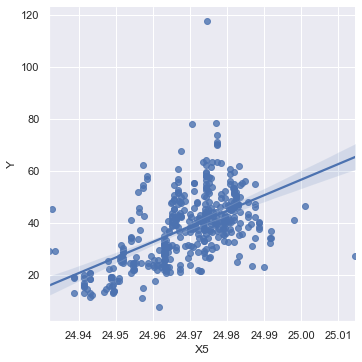

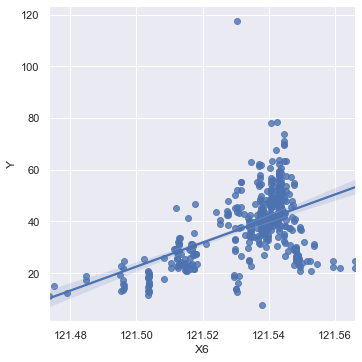

In [27]:
sns.set_theme(color_codes=True)
sns.lmplot(x="No", y="Y", data=df);
sns.lmplot(x="X1", y="Y", data=df);
sns.lmplot(x="X2", y="Y", data=df);
sns.lmplot(x="X3", y="Y", data=df);
sns.lmplot(x="X4", y="Y", data=df);
sns.lmplot(x="X5", y="Y", data=df);
sns.lmplot(x="X6", y="Y", data=df);

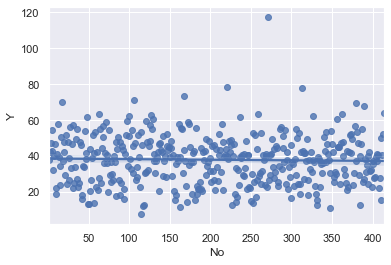

In [28]:
sns.regplot(x="No", y="Y", data=df);


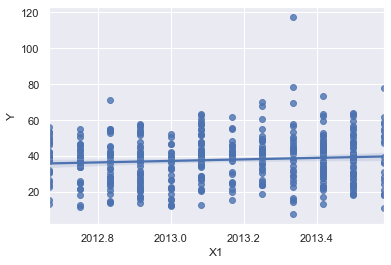

In [29]:
sns.regplot(x="X1", y="Y", data=df);


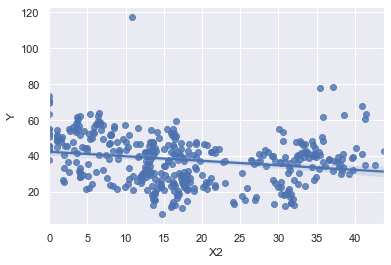

In [30]:

sns.regplot(x="X2", y="Y", data=df);


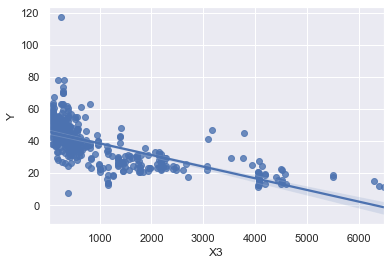

In [31]:

sns.regplot(x="X3", y="Y", data=df);


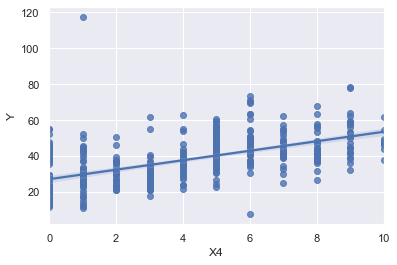

In [32]:

sns.regplot(x="X4", y="Y", data=df);


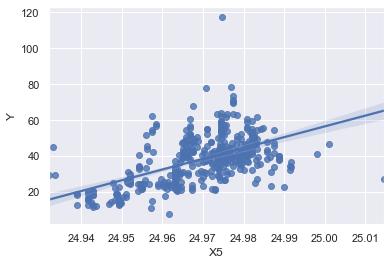

In [33]:

sns.regplot(x="X5", y="Y", data=df);


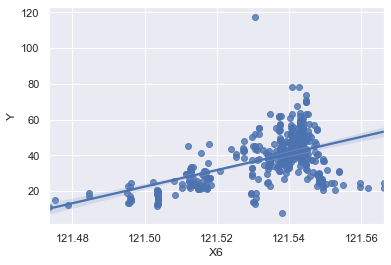

In [34]:

sns.regplot(x="X6", y="Y", data=df);

<AxesSubplot:xlabel='X6', ylabel='Y'>

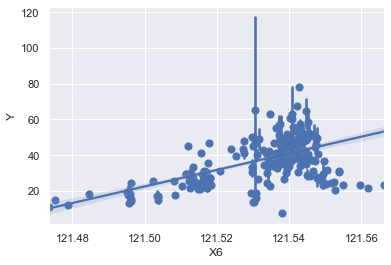

In [35]:
sns.regplot(x="X6", y="Y", data=df, x_estimator=np.mean)

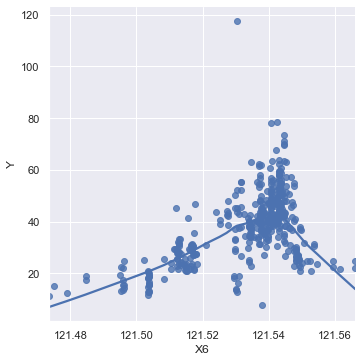

In [36]:
sns.lmplot(x="X6", y="Y", data=df,
           lowess=True);

In [37]:
df.drop(["No"], axis=1)

,X1,X2,X3,X4,X5,X6,Y
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
